In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
def getDataSetX(item, start, to, size) :
    arr = []
    for i in range(start, to - (size-1)) :
        arr.append(item[i:i+size , 0])
    nparr = np.array(arr)
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))
    return (nparr)

In [3]:
def getDataSetY(item, start, to, size) :
    arr = []
    for i in range(start + size, to + 1) :
        arr.append(item[i, 0])
    nparr = np.array(arr)
    return (nparr)

In [4]:
df = pd.read_csv("C:/Users/user8/Desktop/Temp_data.csv")
df = df.iloc[ :100000]
print(df.shape)

(100000, 7)


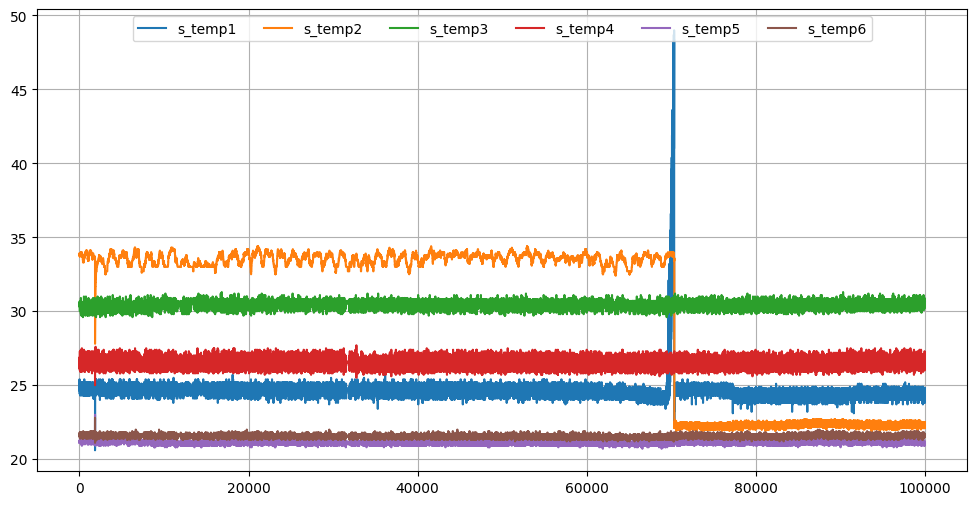

In [5]:
plt.figure(figsize=(12,6))

plt.plot(df['S_TEMP1'], label='s_temp1')
plt.plot(df['S_TEMP2'], label='s_temp2')
plt.plot(df['S_TEMP3'], label='s_temp3')
plt.plot(df['S_TEMP4'], label='s_temp4')
plt.plot(df['S_TEMP5'], label='s_temp5')
plt.plot(df['S_TEMP6'], label='s_temp6')
plt.legend(loc='upper center', ncol=6)
plt.grid()

plt.show()

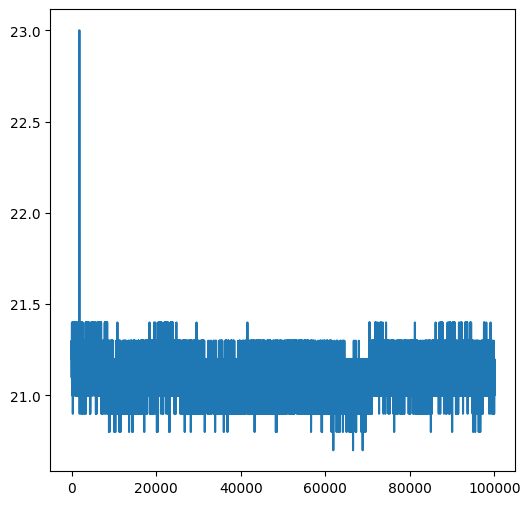

In [6]:
plt.figure(figsize=(6,6))
plt.plot(df['S_TEMP5'])
plt.show()

In [7]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['S_TIME', 'S_TEMP5'])

for i in range(0, len(data)) :
    
    new_data['S_TIME'][i] = data['S_TIME'][i]
    new_data['S_TEMP5'][i] = data['S_TEMP5'][i]
    
new_data.index = new_data.S_TIME
new_data.drop('S_TIME', axis=1, inplace=True)

final_data = new_data.values

train_idx = int(final_data.shape[0] * 0.8)

print(train_idx)
print(final_data.shape[0] - train_idx)

80000
20000


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data) 

In [9]:
x_train = getDataSetX(scaled_data, 0, train_idx-1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx-1, 10)
x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0]-1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0]-1, 10)

In [10]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32,
                             validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0012 - val_loss: 7.9940e-04
Epoch 2/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.5378e-04 - val_loss: 6.3251e-04
Epoch 3/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.0764e-04 - val_loss: 6.7163e-04
Epoch 4/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.0856e-04 - val_loss: 6.1477e-04
Epoch 5/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.0295e-04 - val_loss: 6.4048e-04
Epoch 6/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.0131e-04 - val_loss: 6.1392e-04
Epoch 7/10
2000/2000 [==============================] - 10s 5ms/step - loss: 6.0055e-04 - val_loss: 6.1154e-04
Epoch 8/10
2000/2000 [==============================] - 10s 5ms/step - loss: 5.9757e-04 - val_loss: 6.2500e-04
Epoch 9/10
2000/2000 [==============================] - 10s 5ms/step - loss: 5.9665e-04 - val_loss: 6.1287e-04
Epoch

In [12]:
lstm_model.save('C:/Users/user8/Desktop/lstm_temp5.h5')

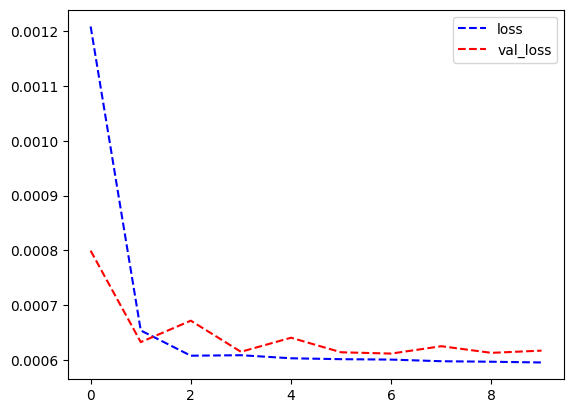

In [13]:
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [14]:
pred_s_temp5 = lstm_model.predict(x_test)
pred_s_temp5 = scaler.inverse_transform(pred_s_temp5)

In [15]:
test_data = final_data[train_idx: , : ]
print(test_data[10:, 0])
print(pred_s_temp5[ : , 0])

# MAPE(Mean Absolute Percentage Error)
print(np.mean(np.abs((test_data[10:, 0] - pred_s_temp5[ : , 0]) / test_data[10:, 0]))*100)

[21.1 21.1 21.1 ... 21.1 21.1 21.1]
[21.019245 21.083014 21.111319 ... 21.041887 21.073849 21.103176]
0.19330835116897338


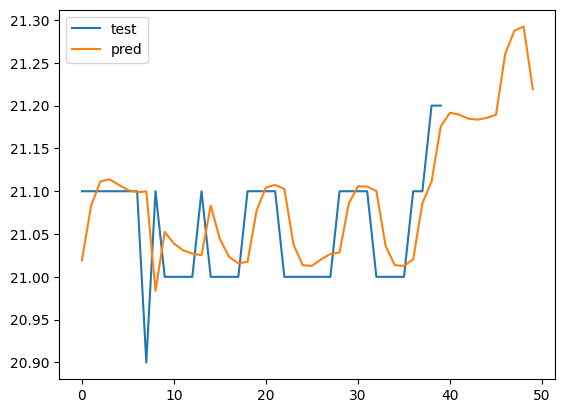

In [16]:
plt.plot(test_data[10:50, 0], label='test')
plt.plot(pred_s_temp5[:50], label='pred')
plt.legend()
plt.show()